In [4]:
try:
    __IPYTHON__
    from tqdm.notebook import tqdm
except NameError:
    from tqdm import tqdm

In [5]:
from src import extract_itsdb
from src import preprocess
from src import dg_util

In [6]:
import delphin
from delphin.codecs import simplemrs, dmrsjson
from delphin.dmrs import from_mrs
from delphin.mrs._exceptions import MRSError, MRSSyntaxError

from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image

In [7]:
from pprint import pprint
import gzip
import numpy as np
from collections import defaultdict

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
# ww1212tar_dir = "1212"
# extract_itsdb.main(ww1212tar_dir)

In [10]:
# ww1212_dir = "ww"
# preprocess.main(ww1212_dir)

## un-tar export files

In [11]:
ww1212tar_dir = "1212"
# untar the export files to exports, e.g. 1212/export0.tar to exports/export0

## Examine an instance

In [17]:
err_cnt = 0
cnt = 0
dmrs_json = None
dmrs_json_str = None
with gzip.open("exports/export0/uio/wikiwoods/1212/export/20910.gz", mode = 'rb') as f:
    text = f.read().decode("utf-8") 
    structs = text.split("\4")
    for idx, struct in enumerate(tqdm(structs)):
        if idx != 2:
            continue
        snt, anc, yyinput, drv, cat, mrs, eds, dmrs_noScope, _ = struct.split("\n\n")
        print (
'''
--sentence:\n{}\n
--anchor:\n{}\n
--yyinput:\n{}\n
--derivation:\n{}\n
--syntactic category:\n{}\n
--minimal recursion semantics:\n{}\n
--elementary dependency structure:\n{}\n
--dmrs without scope info:\n{}\n
'''.format(snt, anc, yyinput, drv, cat, mrs, eds, dmrs_noScope)
        )
        try:
            dmrs = from_mrs(simplemrs.decode(mrs))
            dmrs_json = dmrsjson.to_dict(dmrs)
            print (
'''
--dependency MRS:\n{}
'''.format(dmrs_json)
            )
        except MRSSyntaxError as e:
            err_cnt += 1
            pass
        break
        

  0%|          | 0/2421 [00:00<?, ?it/s]


--sentence:

[1208100000020] (1 of 1) {1} `It is popular throughout ⌊>Great Britain>⌋ and ⌊>Ireland>⌋.'

[1208100000020:0] (active)

--anchor:
<
  (1, 0, 1, <0:2>, 1, "It", 0, "null", "PRP" 1.0)
  (2, 1, 2, <3:5>, 1, "is", 0, "null", "VBZ" 1.0)
  (3, 2, 3, <6:13>, 1, "popular", 0, "null", "JJ" 1.0)
  (4, 3, 4, <14:24>, 1, "throughout", 0, "null", "IN" 1.0)
  (5, 4, 5, <27:32>, 1, "Great", 0, "null", "NNP" 0.9781 "JJ" 0.0219)
  (6, 5, 6, <33:40>, 1, "Britain", 0, "null", "NNP" 1.0)
  (7, 6, 7, <43:46>, 1, "and", 0, "null", "CC" 1.0)
  (8, 7, 8, <49:56>, 1, "Ireland", 0, "null", "NNP" 1.0)
  (9, 8, 9, <58:59>, 1, ".", 0, "null", "." 1.0)
>

--yyinput:
<
  (105, 0, 1, <0:2>, 1, "it", 0, "null")
  (88, 1, 2, <3:5>, 1, "is", 0, "null")
  (101, 1, 2, <3:5>, 1, "is", 0, "null", "VBZ" 1.0)
  (90, 2, 3, <6:13>, 1, "popular", 0, "null")
  (102, 2, 3, <6:13>, 1, "popular", 0, "null", "JJ" 1.0)
  (92, 3, 4, <14:24>, 1, "throughout", 0, "null")
  (76, 4, 5, <27:32>, 1, "Great", 0, "null")
  (99, 

## Visualize a DMRS


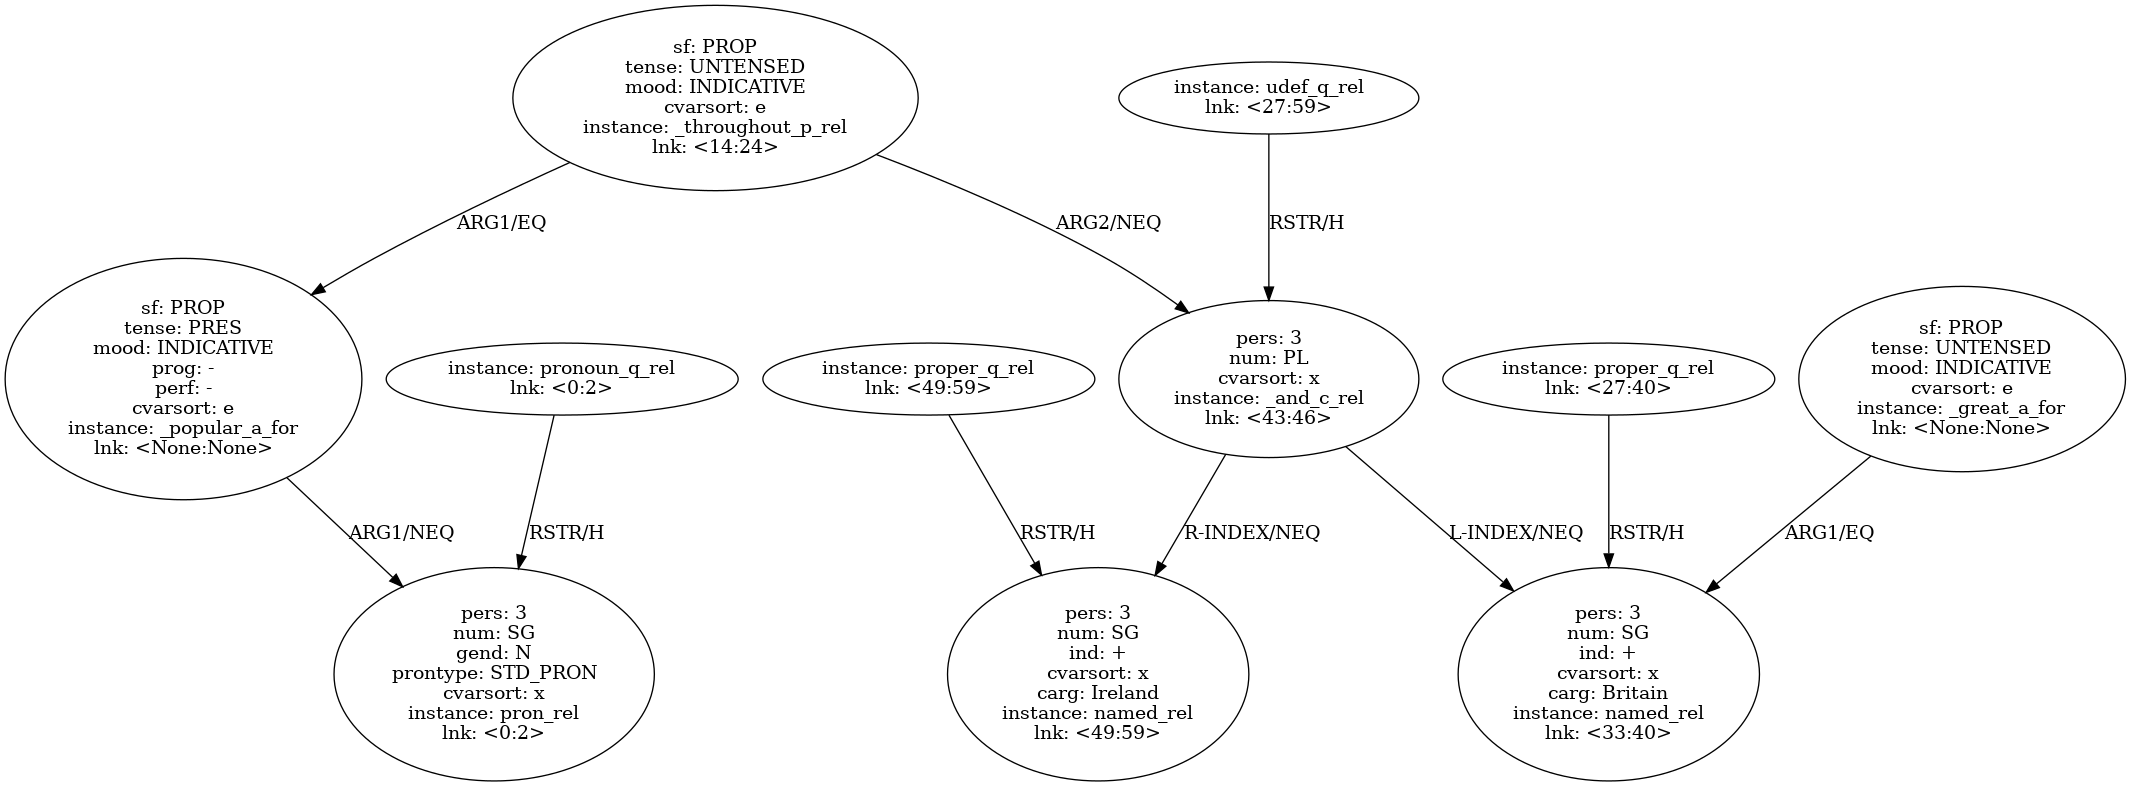

In [18]:
name = 'test'
erg_digraphs = dg_util.Erg_DiGraphs()
erg_digraphs.init_dmrsjson(dmrs_json, draw = True)
save_path = "./figures/dmrs_{}.png".format(name)#+ time.asctime( time.localtime(time.time()) ).replace(" ", "-") +".png"
ag = to_agraph(erg_digraphs.dmrs_dg)
ag.layout('dot')
ag.draw(save_path)
Image(save_path)

In [19]:
dmrs_json

{'nodes': [{'nodeid': 10000,
   'predicate': 'pron_rel<0:2>',
   'sortinfo': {'PERS': '3',
    'NUM': 'sg',
    'GEND': 'n',
    'PRONTYPE': 'std_pron',
    'cvarsort': 'x'}},
  {'nodeid': 10001, 'predicate': 'pronoun_q_rel<0:2>'},
  {'nodeid': 10002,
   'predicate': '_popular_a_for',
   'sortinfo': {'SF': 'prop',
    'TENSE': 'pres',
    'MOOD': 'indicative',
    'PROG': '-',
    'PERF': '-',
    'cvarsort': 'e'},
   'lnk': {'from': 6, 'to': 13}},
  {'nodeid': 10003,
   'predicate': '_throughout_p_rel<14:24>',
   'sortinfo': {'SF': 'prop',
    'TENSE': 'untensed',
    'MOOD': 'indicative',
    'cvarsort': 'e'}},
  {'nodeid': 10004, 'predicate': 'udef_q_rel<27:59>'},
  {'nodeid': 10005, 'predicate': 'proper_q_rel<27:40>'},
  {'nodeid': 10006,
   'predicate': '_great_a_for',
   'sortinfo': {'SF': 'prop',
    'TENSE': 'untensed',
    'MOOD': 'indicative',
    'cvarsort': 'e'},
   'lnk': {'from': 27, 'to': 32}},
  {'nodeid': 10007,
   'predicate': 'named_rel<33:40>',
   'sortinfo': {'PERS